In [9]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json

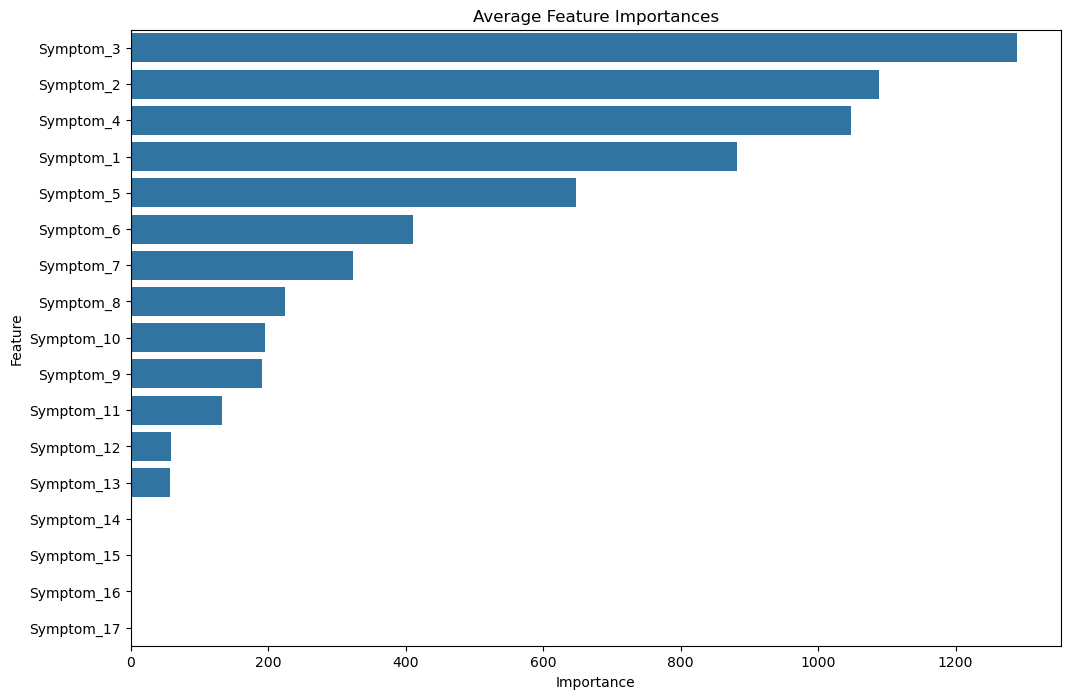


Top 10 Features:
['Symptom_3', 'Symptom_2', 'Symptom_4', 'Symptom_1', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_10', 'Symptom_9']

Dataframe with top features:
   Symptom_3  Symptom_2  Symptom_4  Symptom_1  Symptom_5  Symptom_6  \
0  -0.484481   1.217623  -0.844871  -0.419646   1.101329  -1.406807   
1   1.894221   1.217623  -1.270008  -0.419646  -0.286231  -0.723637   
2  -0.106051  -1.258541   1.030732   0.648329  -0.874180  -1.054203   
3   1.786098   1.217623  -0.844871   1.400765   1.101329  -1.406807   
4  -1.241340  -0.645629  -1.044935  -1.706070   0.513380  -1.362732   

   Symptom_7  Symptom_8  Symptom_10  Symptom_9  
0  -0.602843  -1.060744    0.471813  -3.826009  
1  -2.146642  -1.718877    0.471813  -1.723460  
2  -0.602843  -1.060744   -2.631713  -1.356348  
3  -2.146642   0.631598    0.548129   0.545958  
4  -0.977765   0.349541    0.548129   0.545958  


In [10]:
# Load the trained voting classifier
voting_clf = joblib.load("../src/models/voting_classifier_model.joblib")

# Load the scaled test data
X_test_scaled = pd.read_csv("../data/processed/X_test_scaled.csv")

# Load the symptom mapping from the JSON file
with open("../data/processed/symptom_mapping.json", "r") as f:
    feature_mapping = json.load(f)

# Get feature importances from the underlying estimators (if available)
feature_importances = {}
for item in voting_clf.estimators_:
    if isinstance(item, tuple):
        name, estimator = item
        if hasattr(estimator, "feature_importances_"):
            feature_importances[name] = estimator.feature_importances_
        elif hasattr(estimator, "coef_"):
            feature_importances[name] = np.abs(estimator.coef_).mean(axis=0)
    else:
        estimator = item
        if hasattr(estimator, "feature_importances_"):
            feature_importances[str(estimator)] = estimator.feature_importances_
        elif hasattr(estimator, "coef_"):
            feature_importances[str(estimator)] = np.abs(estimator.coef_).mean(axis=0)

# Average feature importances across estimators
if feature_importances:
    average_importances = np.mean(list(feature_importances.values()), axis=0)

    # Get feature names from X_test_scaled
    feature_names = X_test_scaled.columns

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": average_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Importance", y="Feature", data=importance_df)
    plt.title("Average Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

    # Pick top features:
    top_n = 10 # Change this value to get a different number of top features.
    top_features = importance_df['Feature'].head(top_n).tolist()
    print(f"\nTop {top_n} Features:")
    print(top_features)

    #Create a new dataframe with only the top n features
    X_test_top_features = X_test_scaled[top_features]
    print("\nDataframe with top features:")
    print(X_test_top_features.head())

else:
    print("Feature importance visualization is not available for this voting classifier.")